# **1.** **Importing** & **Ploting** liberaries

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

## **1.1.** Setting style to **ggplot**

In [97]:
plt.style.use('ggplot')
%matplotlib inline

## **1.2.** Setting plot **Size**, **Font** & **Mode**

In [98]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font' , **font)
plt.rcParams['savefig.dpi'] = 480
plt.rcParams["figure.figsize"] = (40, 30)

# **1.** Importing **Missclassified** data

In [176]:
missclassified = pd.read_csv("./resources/generatedData/missclassified_first_model.csv")
train_df = pd.read_csv("./resources/originalData/train.csv").drop(columns="ID")
tsne = pd.read_csv("./resources/generatedData/t_sne.csv").iloc[:,1:]

In [175]:
tsne_train_df = pd.concat([train_df,tsne],axis=1)

# **2.** EDA on missclasified Data

In [101]:
print('Number of missclassified dermason as sira:',missclassified[(missclassified['y']=='DERMASON')&(missclassified['y_pred']=='SIRA')].count()[0])

Number of missclassified dermason as sira: 33


In [102]:
numerical_feature = train_df.columns.to_list()[:-1]
continuous_feature =  train_df.columns.to_list()[:-1]
discret_feature = []
catagorical_feature = ["y"]

print("Numerical feature:",len(numerical_feature))
print("Continuous feature:",len(continuous_feature))
print("Discret feature:",len(discret_feature))
print("Catagorical feature:",len(catagorical_feature))

Numerical feature: 16
Continuous feature: 16
Discret feature: 0
Catagorical feature: 1


In [103]:
dermason_as_sira = missclassified[(missclassified['y']=='DERMASON')&(missclassified['y_pred']=='SIRA')]
dermason_as_sira.y="dermason_as_sira"

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [177]:
dermason_or_sira = tsne_train_df[(tsne_train_df.y=="DERMASON") | (tsne_train_df.y=="SIRA")]

In [193]:
col_list = dermason_or_sira.columns.to_list()
col_list.remove('x1')
col_list.remove('x2')
col_list.remove('x3')
col_list.remove('y')

In [195]:
case_stydy_1 = dermason_or_sira.merge(dermason_as_sira.iloc[:,1:],on=col_list)

In [202]:
case_stydy_1 = case_stydy_1.rename({"y_y":'y'},axis=1).drop(columns=["y_x"],axis=1)
case_stydy_1 = pd.concat([case_stydy_1,dermason_or_sira],axis=0)

In [210]:
case_stydy_1.ShapeFactor4 = np.expm1(case_stydy_1.ShapeFactor4)

In [211]:
case_stydy_1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,x1,x2,x3,y,y_pred
0,42008,759.454,280.332717,191.218136,1.466036,0.731248,42419,231.270938,0.711710,0.990311,...,0.824987,0.006673,0.001907,0.680604,0.997790,-2.305443,3.785058,0.815962,dermason_as_sira,SIRA
1,41759,775.473,304.297520,175.560892,1.733288,0.816788,42315,230.584497,0.717361,0.986860,...,0.757760,0.007287,0.001482,0.574200,0.995254,3.437098,3.231979,-2.258158,dermason_as_sira,SIRA
2,41451,757.604,282.674852,187.293892,1.509258,0.748994,41897,229.732567,0.718637,0.989355,...,0.812710,0.006819,0.001835,0.660497,0.996860,-1.193435,3.463944,0.531081,dermason_as_sira,SIRA
3,40633,750.263,268.397800,193.160136,1.389509,0.694307,41121,227.454484,0.755330,0.988133,...,0.847453,0.006605,0.002102,0.718176,0.997913,-4.746431,2.561938,3.489018,dermason_as_sira,SIRA
4,38621,748.950,283.119477,174.488342,1.622570,0.787506,39137,221.751628,0.687892,0.986816,...,0.783244,0.007331,0.001702,0.613471,0.995400,2.754286,3.023629,-1.257002,dermason_as_sira,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,24139,575.109,215.077490,143.132149,1.502650,0.746406,24459,175.313232,0.763506,0.986917,...,0.815117,0.008910,0.002426,0.664415,0.998383,1.016344,3.636001,8.961791,DERMASON,NaN
10822,46039,814.361,322.162386,182.237608,1.767815,0.824632,46403,242.112939,0.683021,0.992156,...,0.751525,0.006998,0.001377,0.564789,0.998443,1.874547,3.482442,-4.543673,SIRA,NaN
10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,...,0.817017,0.007698,0.002116,0.667517,0.997646,0.374555,4.417758,4.871922,DERMASON,NaN
10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,...,0.800159,0.006422,0.001624,0.640255,0.994793,0.144288,2.265051,-2.522230,SIRA,NaN


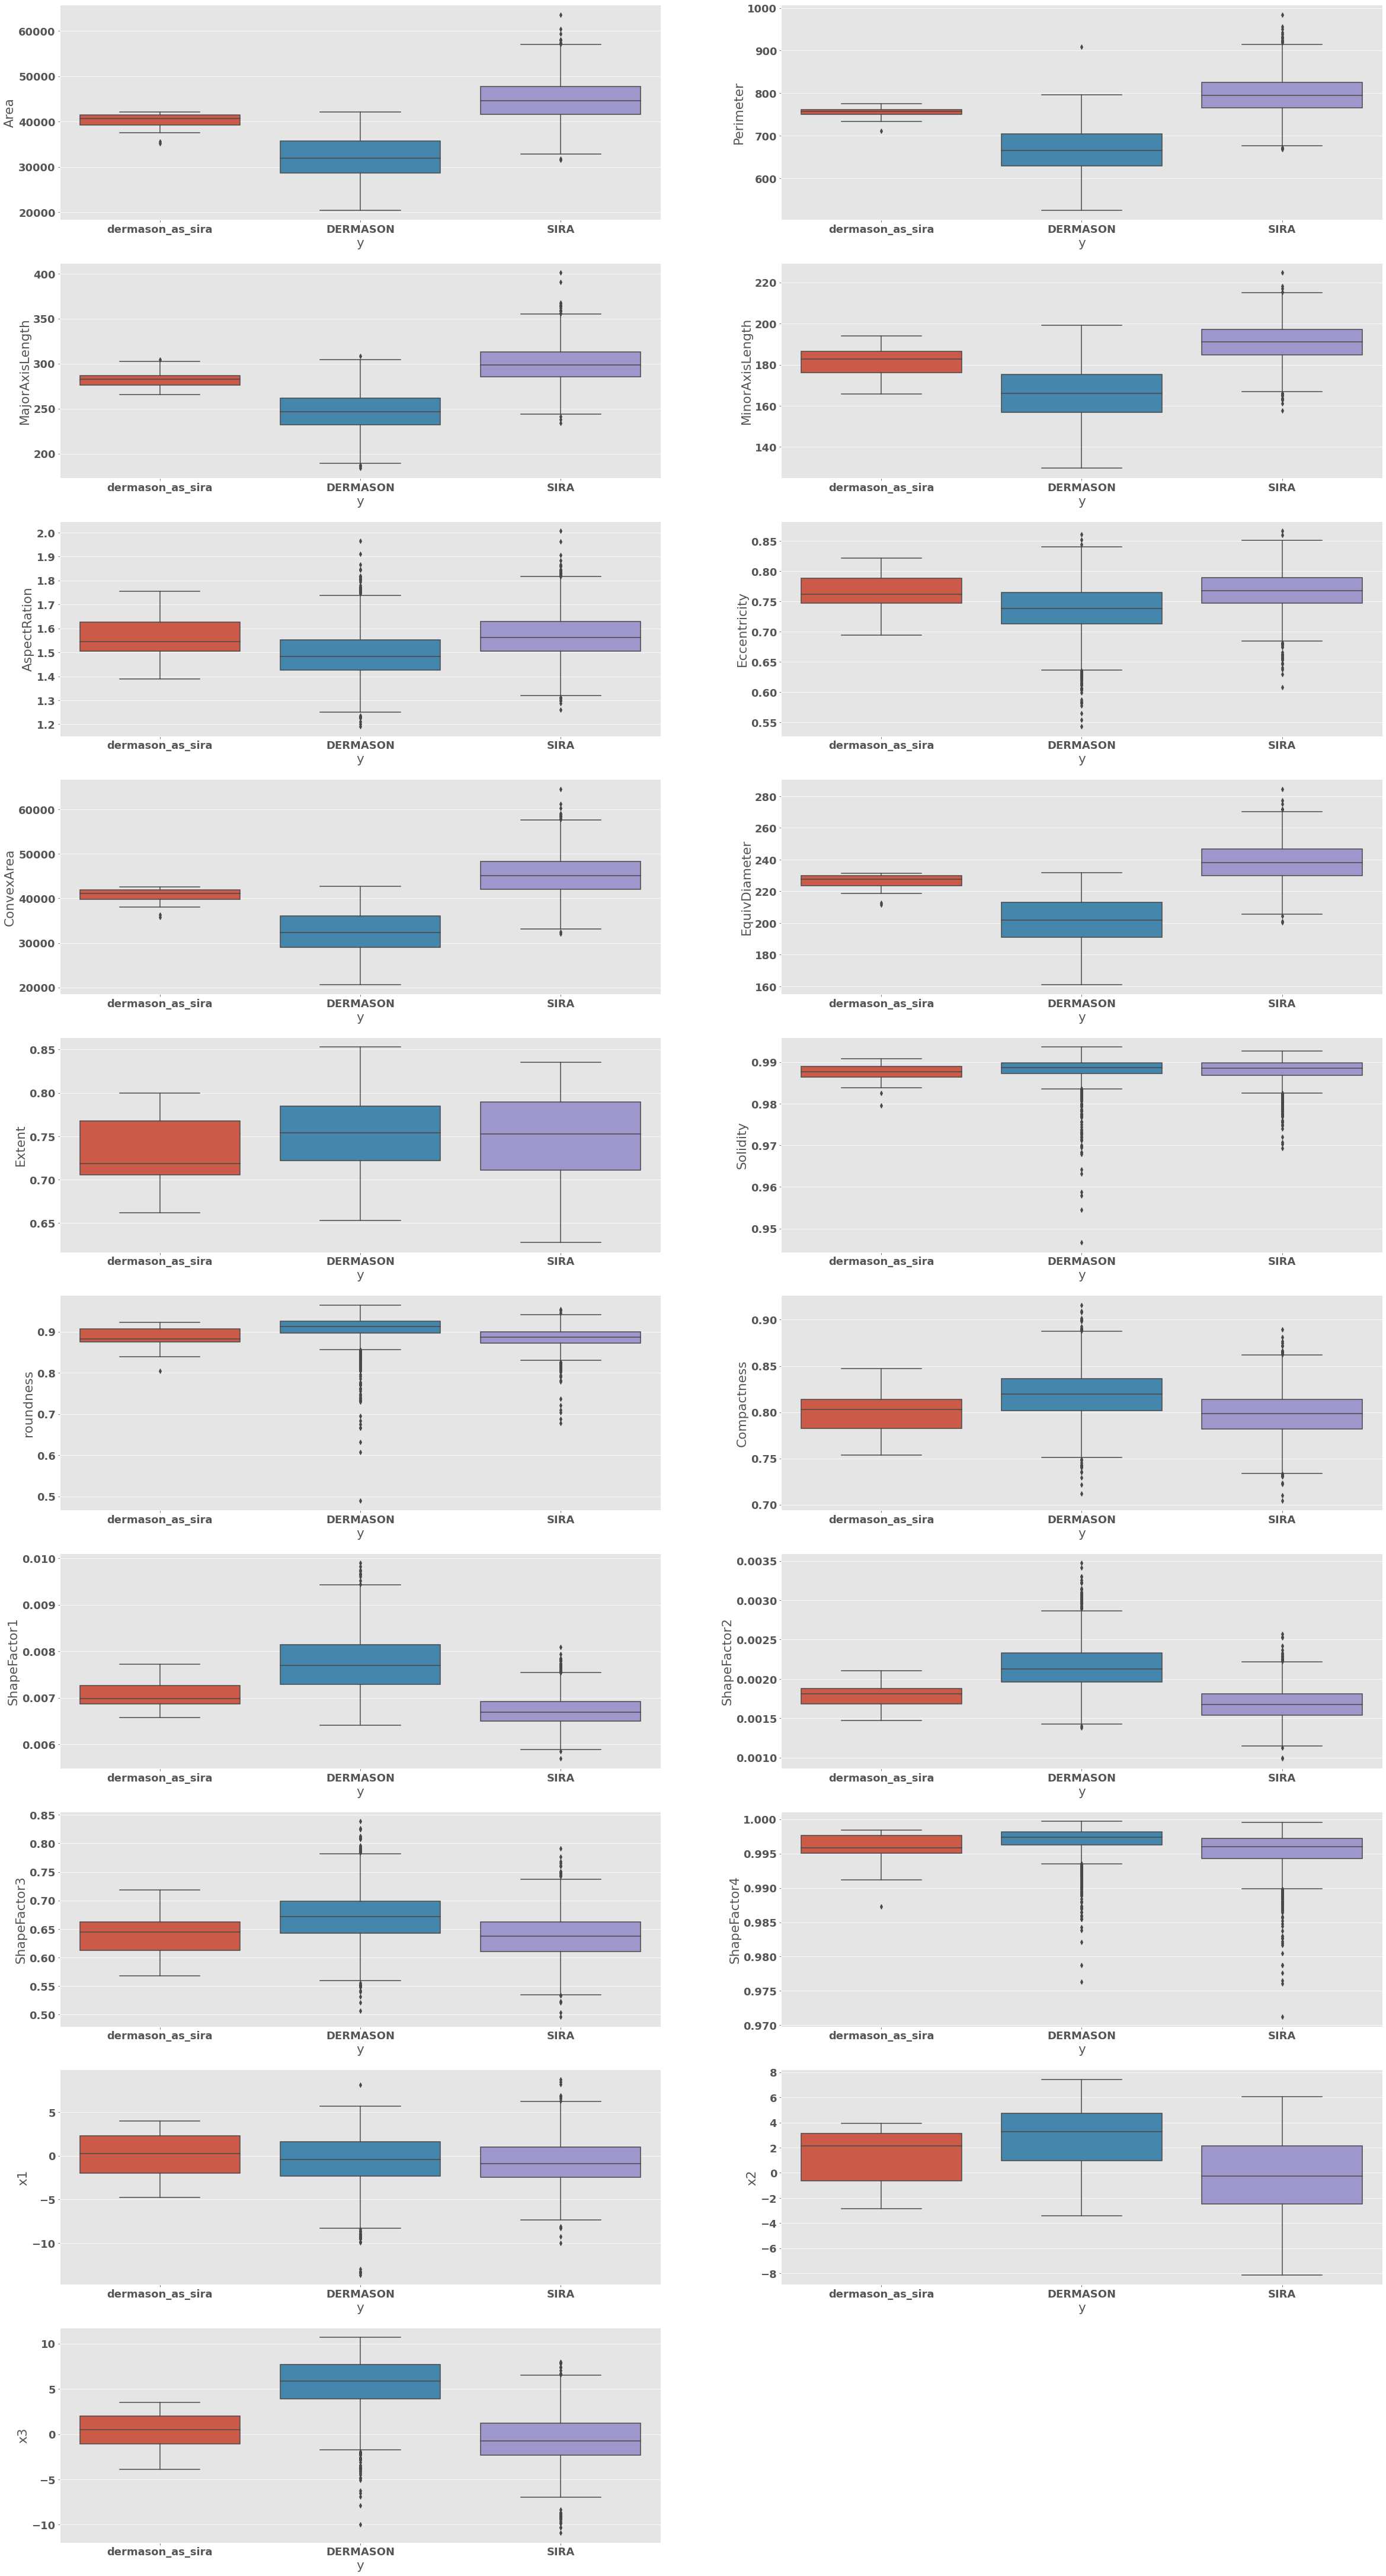

In [212]:
fig = plt.figure(figsize=[40,800])
for index,feature in enumerate(case_stydy_1.columns.to_list()):
    if feature != 'y' and feature != 'y_pred':
        ax = fig.add_subplot(100,2,index+1,)
        sns.boxplot(data=case_stydy_1,x='y',y=feature,ax=ax)

# **It appears that the results are close so the model can't distnguesh**